# Semestrální práce 2

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import concurrent.futures
import time
import pandas as pd
from MWSATInstance import MWSATInstance
from MWSATSolution import MWSATSolution
from simulated_annealing import simulated_annealing
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

# 1) Ukázka implementace
Implementace programové reprezentace MWSAt instancí je v souboru MWSATInstance.py. Jsou uchovávány jednodlivé klauzule a proměnné jsou reprezenovány stejně jako ve vstupním souboru. Pro efektivní práci dále třída MWSATInstance uchovává pro každou proměnnou klauzule v kterých je obsažena.

Pojďme se jen rychle podívat na reprezentaci následujícího souboru:

> c This Formular is generated by mcnf \
> c \
> c    horn? no  \
> c    forced? no  \
> c    mixed sat? no  \
> c    clause length = 3  \
> c \
> c SAT instance uf20-91/uf20-01.cnf \
> p mwcnf 20 91 \
> w 272 39 39 194 1 194 1 78 117 156 39 1 233 311 311 1 311 39 39 311 0 \
> c range 100 1500 straight \
>  4 -18 19 0 \
> 3 18 -5 0 \
> -5 -8 -15 0 \
> -20 7 -16 0 \
> 10 -13 -7 0 \
> -12 -9 17 0 \
> 17 19 5 0 \
> -16 9 15 0 \
> 11 -5 -14 0 \
> 18 -10 13 0 \
> -3 11 12 0 \
> -6 -17 -8 0 \
> -18 14 1 0 \
> -19 -15 10 0 \
> 12 18 -19 0 \
> -8 4 7 0 \
> -8 -9 4 0 \
> 7 17 -15 0 \
> 12 -7 -14 0 \
> -10 -11 8 0 \
> 2 -15 -11 0 \
> 9 6 1 0 \
> -11 20 -17 0 \
> 9 -15 13 0 \
> 12 -7 -17 0 \
> -18 -2 20 0 \
> 20 12 4 0 \
> 19 11 14 0 \
> -16 18 -4 0 \
> -1 -17 -19 0 \
> -13 15 10 0 \
> -12 -14 -13 0 \
> 12 -14 -7 0 \
> -7 16 10 0 \
> 6 10 7 0 \
> 20 14 -16 0 \
> -19 17 11 0 \
> -7 1 -20 0 \
> -5 12 15 0 \
> -4 -9 -13 0 \
> 12 -11 -7 0 \
> -5 19 -8 0 \
> 1 16 17 0 \
> 20 -14 -15 0 \
> 13 -4 10 0 \
> 14 7 10 0 \
> -5 9 20 0 \
> 10 1 -19 0 \
> -16 -15 -1 0 \
> 16 3 -11 0 \
> -15 -10 4 0 \
> 4 -15 -3 0 \
> -10 -16 11 0 \
> -8 12 -5 0 \
> 14 -6 12 0 \
> 1 6 11 0 \
> -13 -5 -1 0 \
> -7 -2 12 0 \
> 1 -20 19 0 \
> -2 -13 -8 0 \
> 15 18 4 0 \
> -11 14 9 0 \
> -6 -15 -2 0 \
> 5 -12 -15 0 \
> -6 17 5 0 \
> -13 5 -19 0 \
> 20 -1 14 0 \
> 9 -17 15 0 \
> -5 19 -18 0 \
> -12 8 -10 0 \
> -18 14 -4 0 \
> 15 -9 13 0 \
> 9 -5 -1 0 \
> 10 -19 -14 0 \
> 20 9 4 0 \
> -9 -2 19 0 \
> -5 13 -17 0 \
> 2 -10 -18 0 \
> -18 3 11 0 \
> 7 -9 17 0 \
> -15 -6 -3 0 \
> -2 3 -13 0 \
> 12 3 -2 0 \
> -2 -3 17 0 \
> 20 -15 -16 0 \
> -5 -17 -19 0 \
> -20 -18 11 0 \
> -9 1 -5 0 \
> -19 9 17 0 \
> 12 -2 17 0 \
> 4 -16 -5 0 \
 \
 \
 \
 \
 \

In [2]:
# instance_demo = MWSATInstance(os.path.join("data","wuf20-91","wuf20-91-M","wuf20-01.mwcnf"))
instance_demo = MWSATInstance(os.path.join("test.mwcnf"))
print("Number of variables: ", instance_demo.num_vars)
print("First clause: ", instance_demo.clauses[0])
print("Clauses for variable 1: ", instance_demo.get_clauses_for_var(1))

print("Weight for variable 1: ", instance_demo.get_weight_for_variable(1))
print("Weight for variable 2: ", instance_demo.get_weight_for_variable(2))
print("Weight for variable 3: ", instance_demo.get_weight_for_variable(3))

print("Max-weight: ", instance_demo.max_single_weight)
print("Eval for [1,1,1]: ", instance_demo.evaluate([1,1,1]))
print("Eval for [1,0,1]: ", instance_demo.evaluate([1,0,1]))

print("Satisfied literals in clause 1, variables [1,1,1]: ", instance_demo.get_satisfied_vars_in_clause_count(instance_demo.clauses[0],[1,1,1]))

Number of variables:  3
First clause:  (1, -2, 3)
Clauses for variable 1:  [(1, -2, 3)]
Weight for variable 1:  272
Weight for variable 2:  39
Weight for variable 3:  39
Max-weight:  272
Eval for [1,1,1]:  (350, 1.2867647058823528, True)
Eval for [1,0,1]:  (311, 1.1433823529411764, True)
Satisfied literals in clause 1, variables [1,1,1]:  2


In [3]:
solution = MWSATSolution(instance_demo)

print("Clauses: ", solution.instance.clauses)
print("Solution var values: ", solution.variable_values)
print("Solution score: ", solution.current_score)
print("Solution clauses satisfied", solution.clauses_satisfied)
print("-------Solution flip 1----- ")
solution.update_variable_and_score(1)
print("Solution var values after: ", solution.variable_values)
print("Solution score after: ", solution.current_score)
print("Solution clauses satisfied after: ", solution.clauses_satisfied)

Clauses:  [(1, -2, 3)]
Solution var values:  [0, 1, 1]
Solution score:  78
Solution clauses satisfied 1
-------Solution flip 1----- 
Solution var values after:  [1, 1, 1]
Solution score after:  350
Solution clauses satisfied after:  1


In [4]:
instance1 = MWSATInstance(os.path.join("data","wuf50-218","wuf50-218-M","wuf50-02.mwcnf"),penalty_violation_factor=3)
# result_solution, history_clauses_sat, history_raw_score = simulated_annealing(instance1,1000,0.05,100,0.01)
result_solution, history = simulated_annealing(instance1,1000,0.95,100,max_steps_without_improvement=10000,fitness_coefficient=1)
print(result_solution.variable_values)
print(result_solution.clauses_satisfied)
print(result_solution.current_score)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
218
24366


# 2) Whitebox fáze
- Cílem této fáze bude nastavit parametry na omezené sadě instancí
- My budeme používat sadu wuf50-218 a z ní první 4 instance 

In [5]:
from helper import evaluate_algorithm_performance,plot_algorithm_run,get_solution_dict, evaluate_param_tuning_no_plot

In [6]:
wuf_50_m_path = os.path.join("data","wuf50-218", "wuf50-218-M")
wuf_50_n_path = os.path.join("data","wuf50-218", "wuf50-218-N")
wuf_50_q_path = os.path.join("data","wuf50-218", "wuf50-218-Q")
wuf_50_r_path = os.path.join("data","wuf50-218", "wuf50-218-R")
wuf_50_path = os.path.join("data","wuf50-218")

wuf_20_r_path = os.path.join("data","wuf20-91", "wuf20-91-R")
wuf_20_n_path = os.path.join("data","wuf20-91", "wuf20-91-N")
wuf_20_q_path = os.path.join("data","wuf20-91", "wuf20-91-Q")
wuf_20_m_path = os.path.join("data","wuf20-91", "wuf20-91-M")
wuf_20_path = os.path.join("data","wuf20-91")

wuf_75_r_path = os.path.join("data","wuf75-325", "wuf75-325-R")
wuf_75_m_path = os.path.join("data","wuf75-325", "wuf75-325-M")
wuf_75_q_path = os.path.join("data","wuf75-325", "wuf75-325-Q")
wuf_75_n_path = os.path.join("data","wuf75-325", "wuf75-325-N")
wuf_75_path = os.path.join("data","wuf75-325")

instance_paths = [os.path.join(wuf_50_r_path,x) for x in os.listdir(wuf_50_r_path)[:10]]
solutions_wuf_50_r = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-R-opt.dat"))

Prvním krokem v White box fáze bude nastavení počáteční teploty. Využijeme vzorec z přdnášky 
$$
T_0 = \frac{\delta}{\ln P_0}
$$

kde $\delta$ je hlouba lokálního optima a $P$ je pravděpodobnost útěku z tohoto optima na počátku. Parametr delta lze spočítat jako průměrnou hloubku lokálních optim a parametr P budeme volit jako hyperparametr.

Pro získání $\delta$ mám upravenou verzi algoritmu simulated_annealing, která ukládá hodnoty při zhoršení. Necháme algoritmus běžet s nekonečnou teplotou, tak aby byla explorace prostoru maximální a zjistili jsme průměrnou hloubku lokálních optim. 

Pro klaždý druh generování vah budou optima mít různé hodnoty takže je budeme muset měřit zvlášť. 

# 2.1) Baseline konfigurace
- Je potřeba vytvořit si nějakou kombinaci parametrů, který funguje "dobře" na zkoumaných instancích
- Od této konfigurace se potom odpíchneme a budeme ladit jednotlivé parametry samostatně

--- Starting Baseline configuration on 50 variable instances (100 total runs) ---
Params: {'P0': 0.9, 'cooling_coefficient': 0.9, 'equilibrium_steps': 3, 'max_steps_without_improvement': 300, 'fitness_coefficient': 100, 'random_flip': True}
Processing Instance 1/10: wuf50-01.mwcnf
Processing Instance 2/10: wuf50-010.mwcnf
Processing Instance 3/10: wuf50-0100.mwcnf
Processing Instance 4/10: wuf50-01000.mwcnf
Processing Instance 5/10: wuf50-0101.mwcnf
Processing Instance 6/10: wuf50-0102.mwcnf
Processing Instance 7/10: wuf50-0103.mwcnf
Processing Instance 8/10: wuf50-0104.mwcnf
Processing Instance 9/10: wuf50-0105.mwcnf
Processing Instance 10/10: wuf50-0106.mwcnf


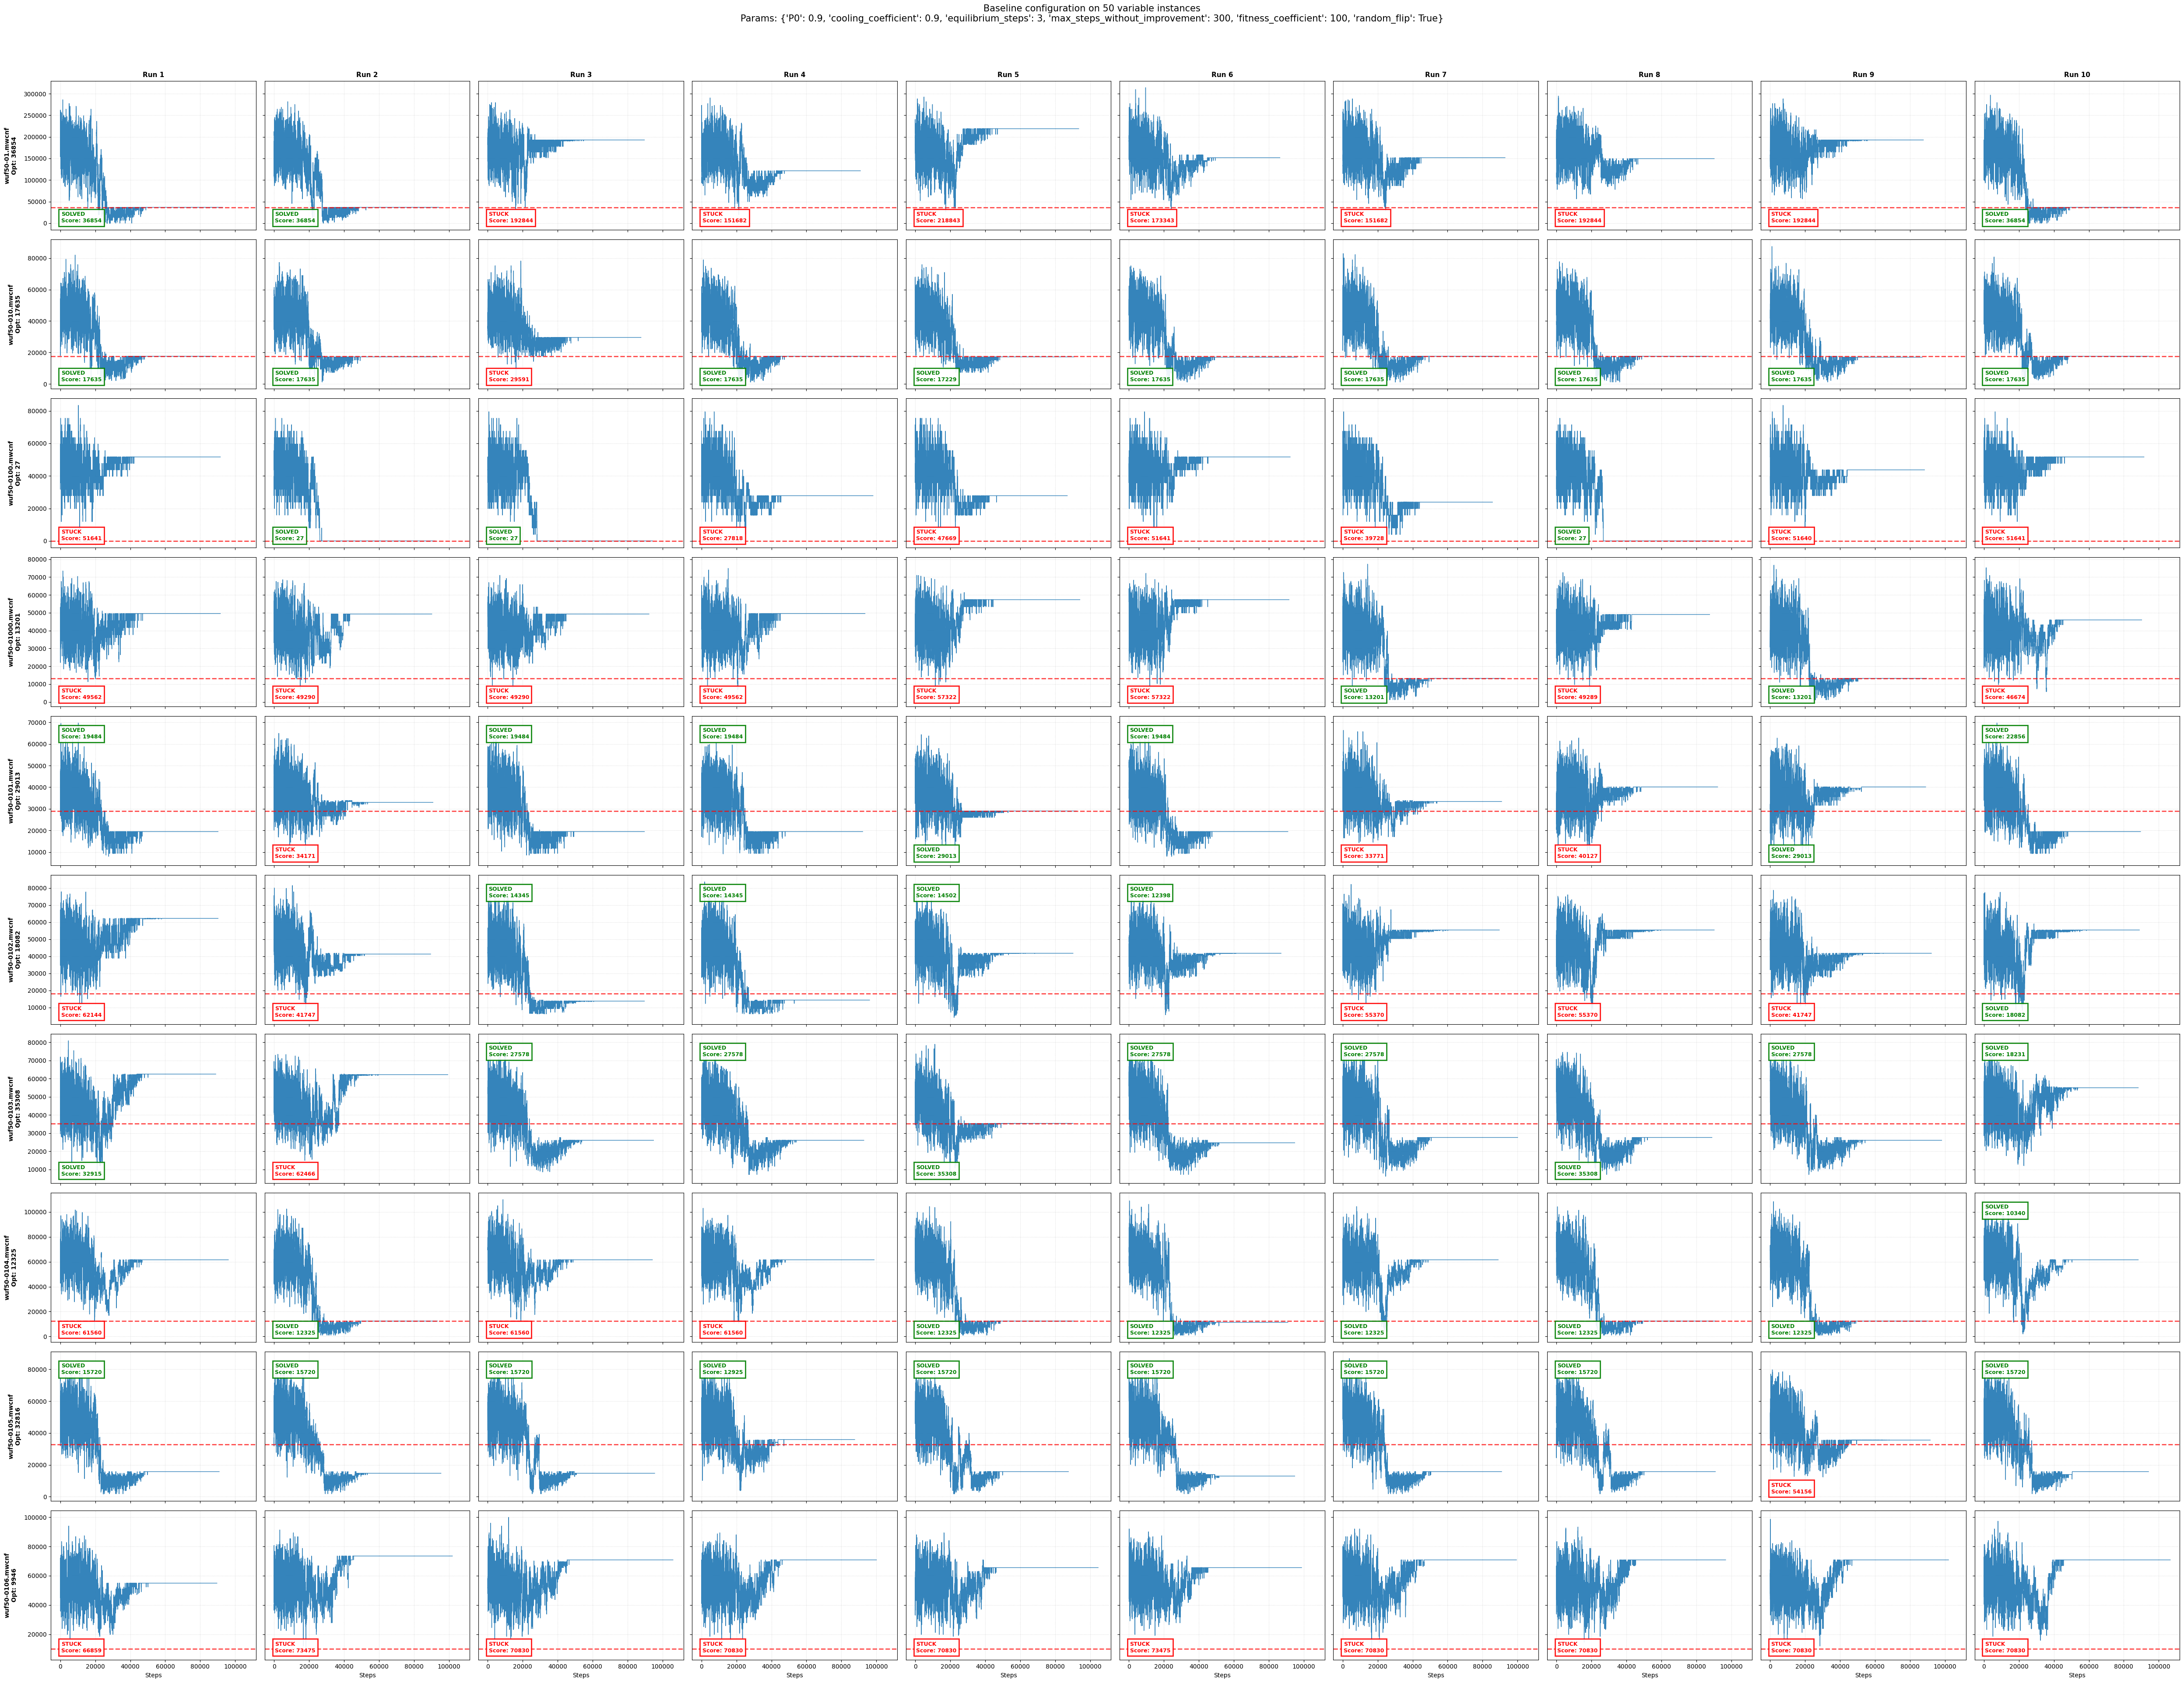


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-01.mwcnf            | 10   | 3      | 3       | 36854.0    | 100.00%  | 90840.6  
wuf50-010.mwcnf           | 10   | 9      | 8       | 17589.9    | 99.74 %  | 91036.8  
wuf50-0100.mwcnf          | 10   | 3      | 3       | 27.0       | 100.00%  | 91363.8  
wuf50-01000.mwcnf         | 10   | 2      | 2       | 13201.0    | 100.00%  | 91298.4  
wuf50-0101.mwcnf          | 10   | 7      | 2       | 22688.3    | 78.20 %  | 90775.2  
wuf50-0102.mwcnf          | 10   | 5      | 1       | 14734.4    | 81.49 %  | 90382.8  
wuf50-0103.mwcnf          | 10   | 9      | 2       | 28850.2    | 81.71 %  | 93652.8  
wuf50-0104.mwcnf          | 10   | 7      | 6       | 12041.4    | 97.70 %  | 92279.4  
wuf50-0105.mwcnf          | 10   | 9      | 0       | 15409.4    | 46.96 %  | 91952.4  
wuf50-0106.mwcnf       

In [7]:
baseline_P0 = 0.9
baseline_cooling_coeff = 0.9
baseline_equilibrium_steps = 3 # Using the new coefficient (6 * 50 = 300)
baseline_max_steps_without_improvement = 300
baseline_fitness_coefficient = 100

PARAMS = {
    "P0": baseline_P0,
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": baseline_fitness_coefficient,
    "random_flip": True
}
results = evaluate_algorithm_performance(instance_paths[:10],solutions_wuf_50_r,PARAMS,10,"Baseline configuration on 50 variable instances")

In [8]:
instance = MWSATInstance(instance_paths[1])
plot_algorithm_run(instance,solutions_wuf_50_r,PARAMS)

<Axes: title={'center': 'wuf50-010.mwcnf'}, xlabel='Steps', ylabel='Score'>

# Zlepší jinej random flip výkon baseline konfigurace

--- Starting Baseline configuration on 50 variable instances (100 total runs) ---
Params: {'P0': 0.9, 'cooling_coefficient': 0.9, 'equilibrium_steps': 3, 'max_steps_without_improvement': 300, 'fitness_coefficient': 100, 'random_flip': False}
Processing Instance 1/10: wuf50-01.mwcnf
Processing Instance 2/10: wuf50-010.mwcnf
Processing Instance 3/10: wuf50-0100.mwcnf
Processing Instance 4/10: wuf50-01000.mwcnf
Processing Instance 5/10: wuf50-0101.mwcnf
Processing Instance 6/10: wuf50-0102.mwcnf
Processing Instance 7/10: wuf50-0103.mwcnf
Processing Instance 8/10: wuf50-0104.mwcnf
Processing Instance 9/10: wuf50-0105.mwcnf
Processing Instance 10/10: wuf50-0106.mwcnf


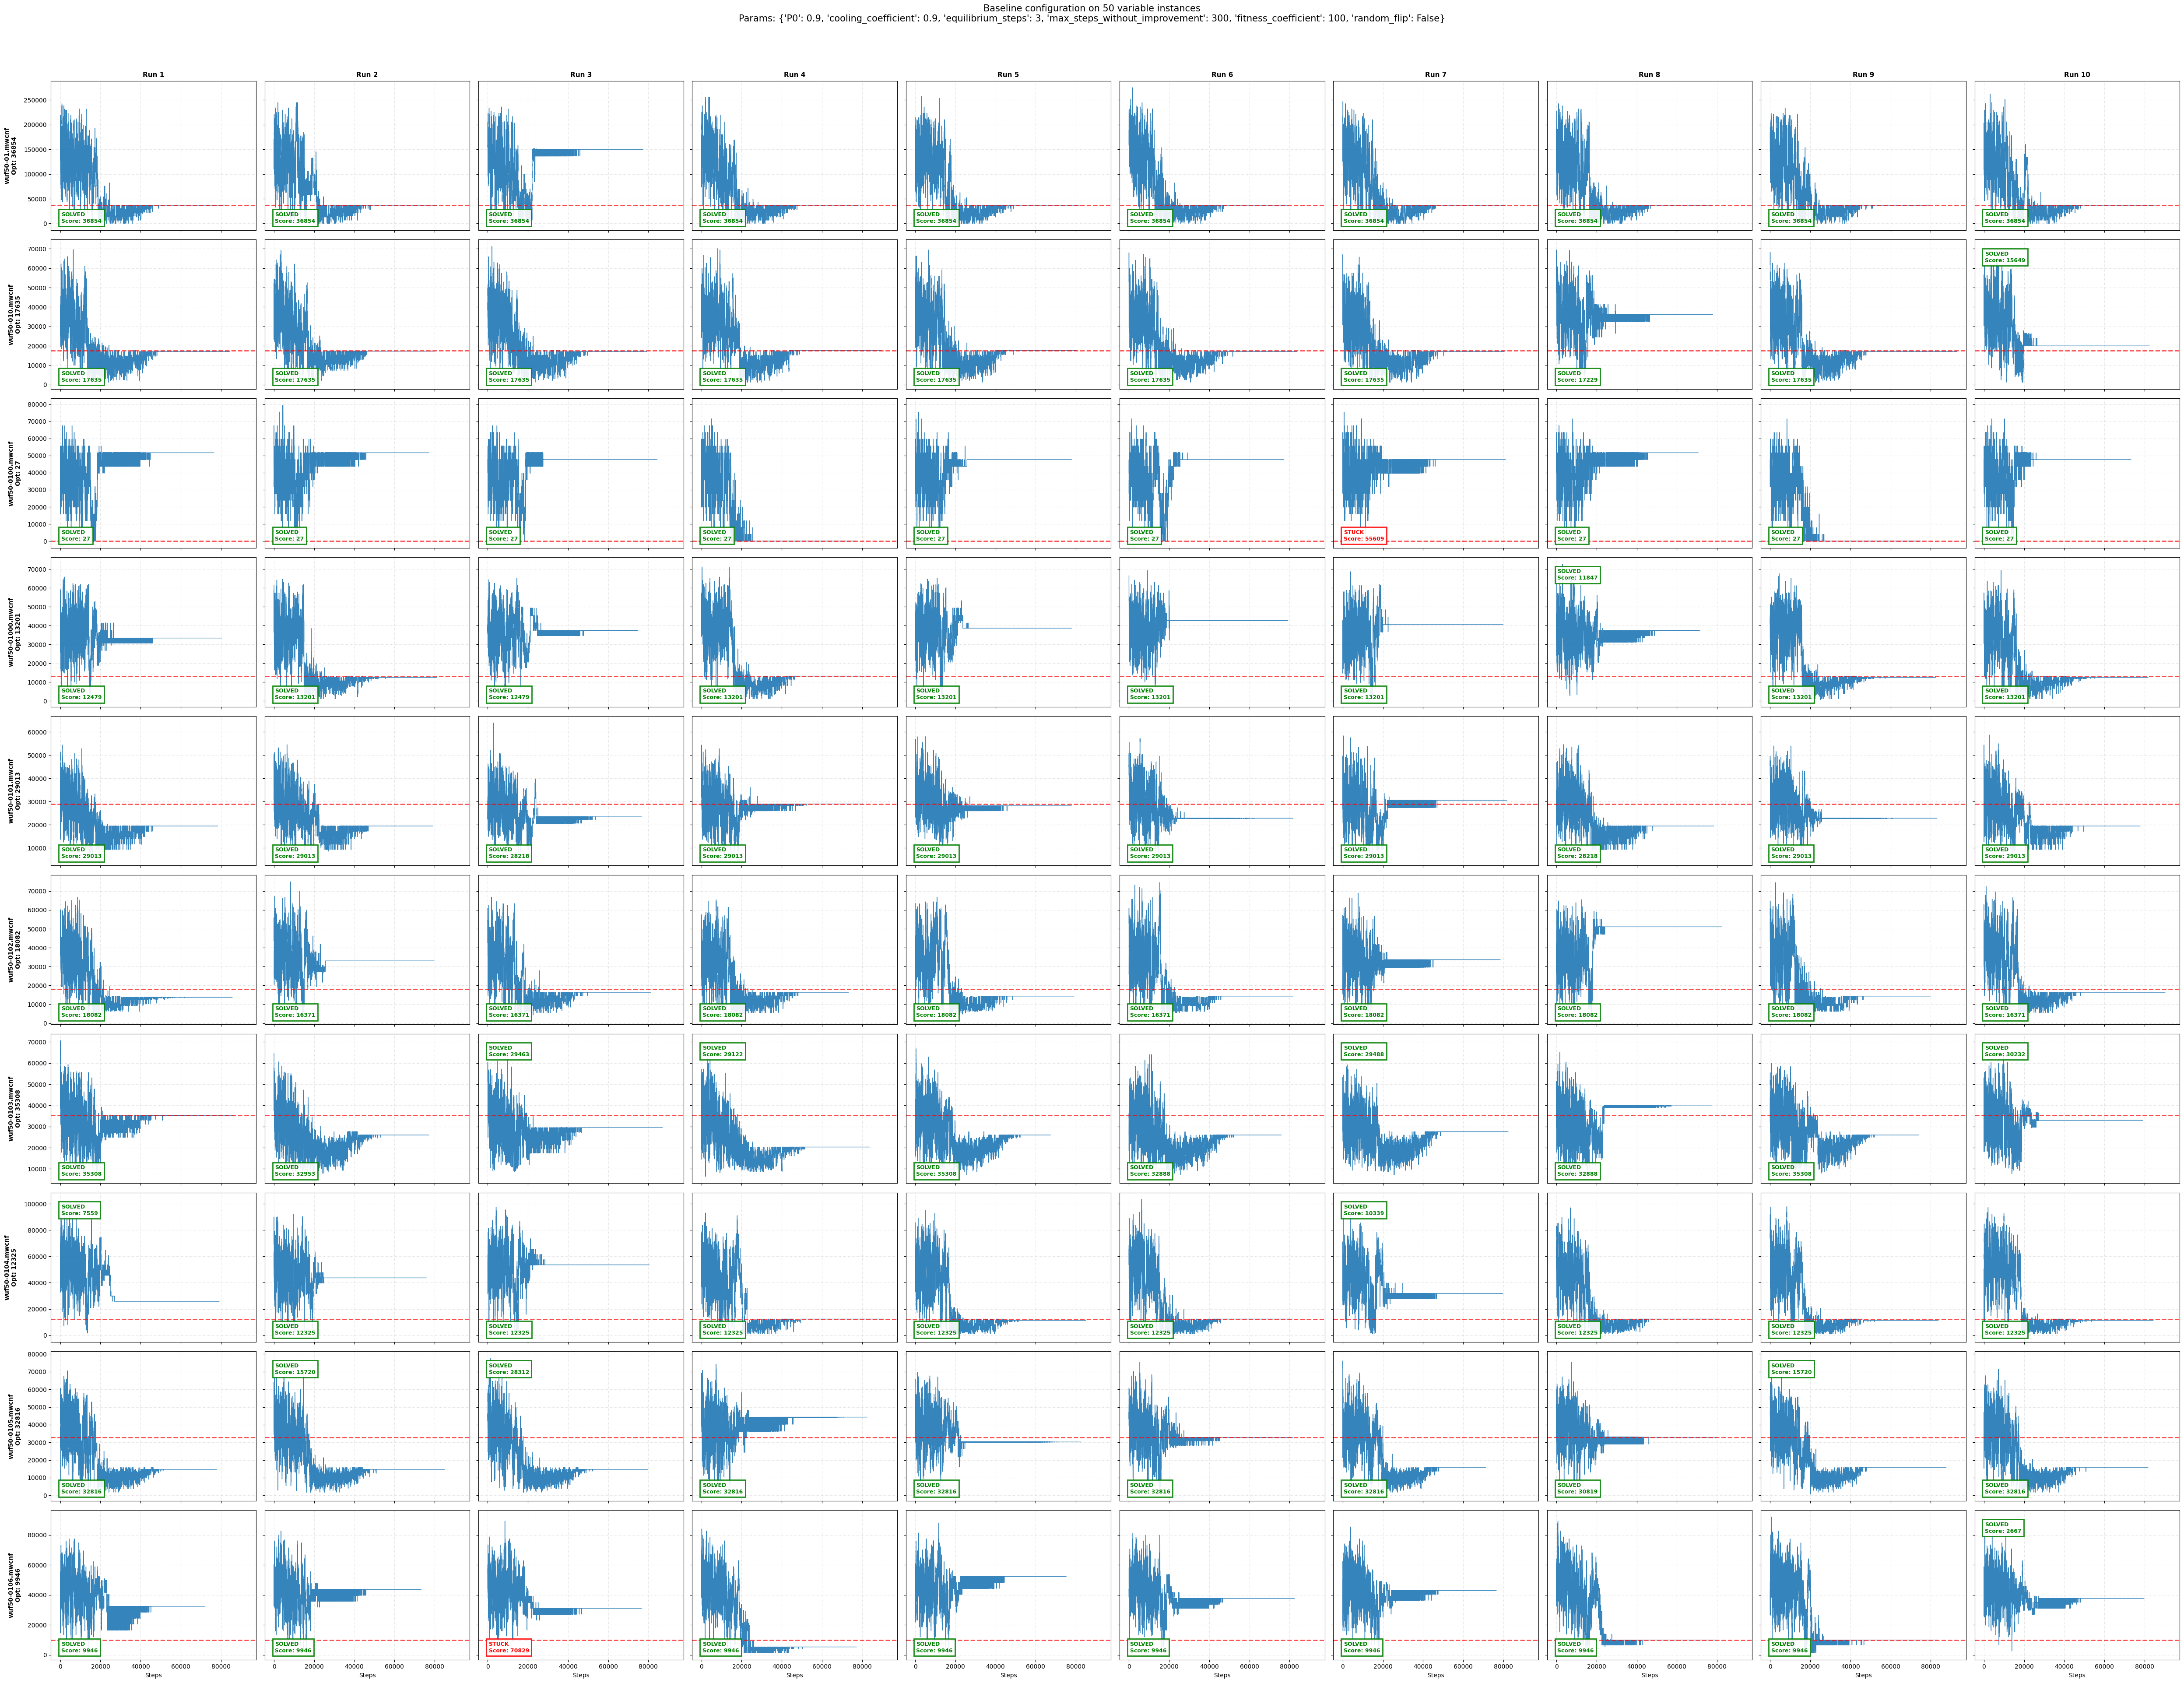


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-01.mwcnf            | 10   | 10     | 10      | 36854.0    | 100.00%  | 80180.4  
wuf50-010.mwcnf           | 10   | 10     | 8       | 17395.8    | 98.64 %  | 83058.0  
wuf50-0100.mwcnf          | 10   | 9      | 9       | 27.0       | 100.00%  | 76975.8  
wuf50-01000.mwcnf         | 10   | 10     | 7       | 12921.2    | 97.88 %  | 79264.8  
wuf50-0101.mwcnf          | 10   | 10     | 8       | 28854.0    | 99.45 %  | 79526.4  
wuf50-0102.mwcnf          | 10   | 10     | 6       | 17397.6    | 96.22 %  | 81161.4  
wuf50-0103.mwcnf          | 10   | 10     | 3       | 32295.8    | 91.47 %  | 79003.2  
wuf50-0104.mwcnf          | 10   | 10     | 8       | 11649.8    | 94.52 %  | 82273.2  
wuf50-0105.mwcnf          | 10   | 10     | 6       | 28746.7    | 87.60 %  | 80965.2  
wuf50-0106.mwcnf       

In [9]:
PARAMS = {
    "P0": baseline_P0,
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": baseline_fitness_coefficient,
    "random_flip": False
}
results = evaluate_algorithm_performance(instance_paths[:10],solutions_wuf_50_r,PARAMS,10,"Baseline configuration on 50 variable instances")

# 2.2 Nastavení Fitness coefficient
Nastavení fitness  velmi ovlivňuje celý algoritmus, zejména míru toho jak moc jsou přijímány horší řešení.

In [10]:
from helper import run_tuning_experiment

In [12]:
base_params = {
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "P0": baseline_P0
}

target_path = instance_paths[0]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="fitness_coefficient",
    param_values=[10,50,100],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=3
)

results = evaluate_param_tuning_no_plot(instance_paths[:10], solutions_wuf_50_r,base_params,"fitness_coefficient",[10,20,50,100,150,200])

--- Tuning 'fitness_coefficient' on wuf50-01.mwcnf (9 total runs) ---
Testing fitness_coefficient = 10...
Testing fitness_coefficient = 50...
Testing fitness_coefficient = 100...



fitness_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
10              | 3    | 3      | 0       | 25298.3    | 68.64 %  | 72812.0  
50              | 3    | 3      | 2       | 33965.0    | 92.16 %  | 80878.0  
100             | 3    | 3      | 2       | 34687.3    | 94.12 %  | 77172.0  

--- Tuning Parameter: 'fitness_coefficient' (Across 10 instances) ---

 fitness_coefficient | Runs   | Solved   | Optimal  | Avg % Opt    | Avg Steps 
------------------------------------------------------------------------------------------
 10              | 40     | 32       | 16       | 90.30        | 78136.6   
 20              | 40     | 36       | 24       | 92.12        | 79624.5   
 50              | 40     | 39       | 34       | 97.57        | 80376.6   
 100             | 40     | 40       | 30       | 96.31        | 79395.6   
 150             | 40     | 38       | 3

[{'Val': 10,
  'Runs': 40,
  'Solved': 32,
  'Optimal': 16,
  'Avg_Pct_Opt': np.float64(90.29540967252592),
  'Avg_Steps': np.float64(78136.65)},
 {'Val': 20,
  'Runs': 40,
  'Solved': 36,
  'Optimal': 24,
  'Avg_Pct_Opt': np.float64(92.12148352591231),
  'Avg_Steps': np.float64(79624.5)},
 {'Val': 50,
  'Runs': 40,
  'Solved': 39,
  'Optimal': 34,
  'Avg_Pct_Opt': np.float64(97.5733430897797),
  'Avg_Steps': np.float64(80376.6)},
 {'Val': 100,
  'Runs': 40,
  'Solved': 40,
  'Optimal': 30,
  'Avg_Pct_Opt': np.float64(96.3076856333606),
  'Avg_Steps': np.float64(79395.6)},
 {'Val': 150,
  'Runs': 40,
  'Solved': 38,
  'Optimal': 30,
  'Avg_Pct_Opt': np.float64(95.57874467917657),
  'Avg_Steps': np.float64(80164.05)},
 {'Val': 200,
  'Runs': 40,
  'Solved': 39,
  'Optimal': 31,
  'Avg_Pct_Opt': np.float64(97.4071031074995),
  'Avg_Steps': np.float64(79461.0)}]

In [13]:
best_fitness_coeff_param = 100

# 2.3) Nastavení `P0`
- Jak dlouho budeme explorovat na začátku

In [15]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "cooling_coefficient": baseline_cooling_coeff
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="P0",
    param_values=[0.6,0.8],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=3
)

results = evaluate_param_tuning_no_plot(instance_paths[:10], solutions_wuf_50_r,base_params,"P0",[0.6,0.7,0.8,0.85,0.9])

--- Tuning 'P0' on wuf50-0100.mwcnf (6 total runs) ---
Testing P0 = 0.6...
Testing P0 = 0.8...



P0              | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.6             | 3    | 2      | 2       | 18.0       | 66.67 %  | 68670.0  
0.8             | 3    | 3      | 3       | 27.0       | 100.00%  | 73466.0  

--- Tuning Parameter: 'P0' (Across 10 instances) ---

 P0              | Runs   | Solved   | Optimal  | Avg % Opt    | Avg Steps 
------------------------------------------------------------------------------------------
 0.6             | 40     | 38       | 28       | 93.87        | 70550.2   
 0.7             | 40     | 39       | 26       | 93.42        | 72446.9   
 0.8             | 40     | 38       | 25       | 93.93        | 75422.6   
 0.85            | 40     | 36       | 27       | 96.60        | 76959.4   
 0.9             | 40     | 36       | 27       | 96.12        | 78659.9   


In [16]:
best_p0_param = 0.8

In [27]:
PARAMS = base_params.copy()
PARAMS["P0"] = best_p0_param


# Grid to test
cooling_values = [0.95, 0.99, 0.995, 0.999]
# Note: These are coefficients (e.g., 4 means 4*N steps)
steps_values = [1, 3,4, 6]

# Robustness settings
target_instances = instance_paths[:10]  # First 10 instances
n_runs_per_instance = 3                 # Runs per instance (Total runs = 10 * 3 = 30 per combo)


print(f"--- Global Grid Search (Total {len(target_instances) * n_runs_per_instance} runs per combo) ---")
print(f"Instances: {len(target_instances)}")
print(f"{'Cooling':<8} | {'Steps':<6} | {'Global Success':<15} | {'Global Avg Score':<16} | {'Total Steps':<12}")
print("-" * 80)

# --- Main Loops (Grid Search) ---
for alpha in cooling_values:
    for steps in steps_values:
        
        # 1. Update Parameters for this Grid Cell
        current_params = PARAMS.copy()
        current_params["cooling_coefficient"] = alpha
        current_params["equilibrium_steps"] = steps # Ensure this key matches your function
        
        # Aggregators for this specific parameter combination
        total_runs_global = 0
        total_solved_global = 0
        total_score_sum = 0
        total_steps_sum = 0
        
        # 2. Loop through ALL Target Instances
        for path in target_instances:
            filename = os.path.basename(path)
            # Find optimum for this specific instance
            key = filename.split(".")[0]
            # Use appropriate dictionary (m=medium/hard, r=random/easy?)
            # Assuming solutions_wuf_50_m is your main dict
            optimal_weight = solutions_wuf_50_r.get(key, 0) 
            
            instance = MWSATInstance(path)

            # 3. Run Repetitions
            for _ in range(n_runs_per_instance):
                best_state, history = simulated_annealing(instance, **current_params)
                
                # Check metrics
                is_valid = (best_state.clauses_satisfied == instance.num_clauses)
                
                # Update sums
                total_runs_global += 1
                total_steps_sum += len(history)
                
                if is_valid:
                    total_solved_global += 1
                    total_score_sum += best_state.current_score
                else:
                    # Penalize invalid runs with 0 score
                    total_score_sum += 0
        
        # 4. Calculate Global Averages for this Combo
        global_success_rate = (total_solved_global / total_runs_global) * 100
        global_avg_score = total_score_sum / total_runs_global
        global_avg_steps = total_steps_sum / total_runs_global


        # 5. Print Result Row
        print(f"{alpha:<8} | {steps:<6} | {global_success_rate:>13.1f}%  | {global_avg_score:>16.1f} | {int(global_avg_steps):<12}")


--- Global Grid Search (Total 30 runs per combo) ---
Instances: 10
Cooling  | Steps  | Global Success  | Global Avg Score | Total Steps 
--------------------------------------------------------------------------------
0.95     | 1      |          93.3%  |          18213.1 | 69069       
0.95     | 3      |         100.0%  |          20319.0 | 82861       
0.95     | 4      |         100.0%  |          20084.1 | 87868       
0.95     | 6      |         100.0%  |          20339.8 | 93434       
0.99     | 1      |         100.0%  |          20519.4 | 89336       
0.99     | 3      |         100.0%  |          20399.2 | 106732      
0.99     | 4      |         100.0%  |          20205.2 | 112982      
0.99     | 6      |         100.0%  |          19924.8 | 113403      
0.995    | 1      |         100.0%  |          20433.3 | 100875      
0.995    | 3      |         100.0%  |          19715.2 | 106275      
0.995    | 4      |          96.7%  |          20026.6 | 121527      
0.995    | 6

# 2.4) Nastavení `cooling coeefficient`

--- Tuning 'cooling_coefficient' on wuf50-069.mwcnf (25 total runs) ---
Testing cooling_coefficient = 0.95...
Testing cooling_coefficient = 0.99...
Testing cooling_coefficient = 0.995...
Testing cooling_coefficient = 0.999...
Testing cooling_coefficient = 0.9995...


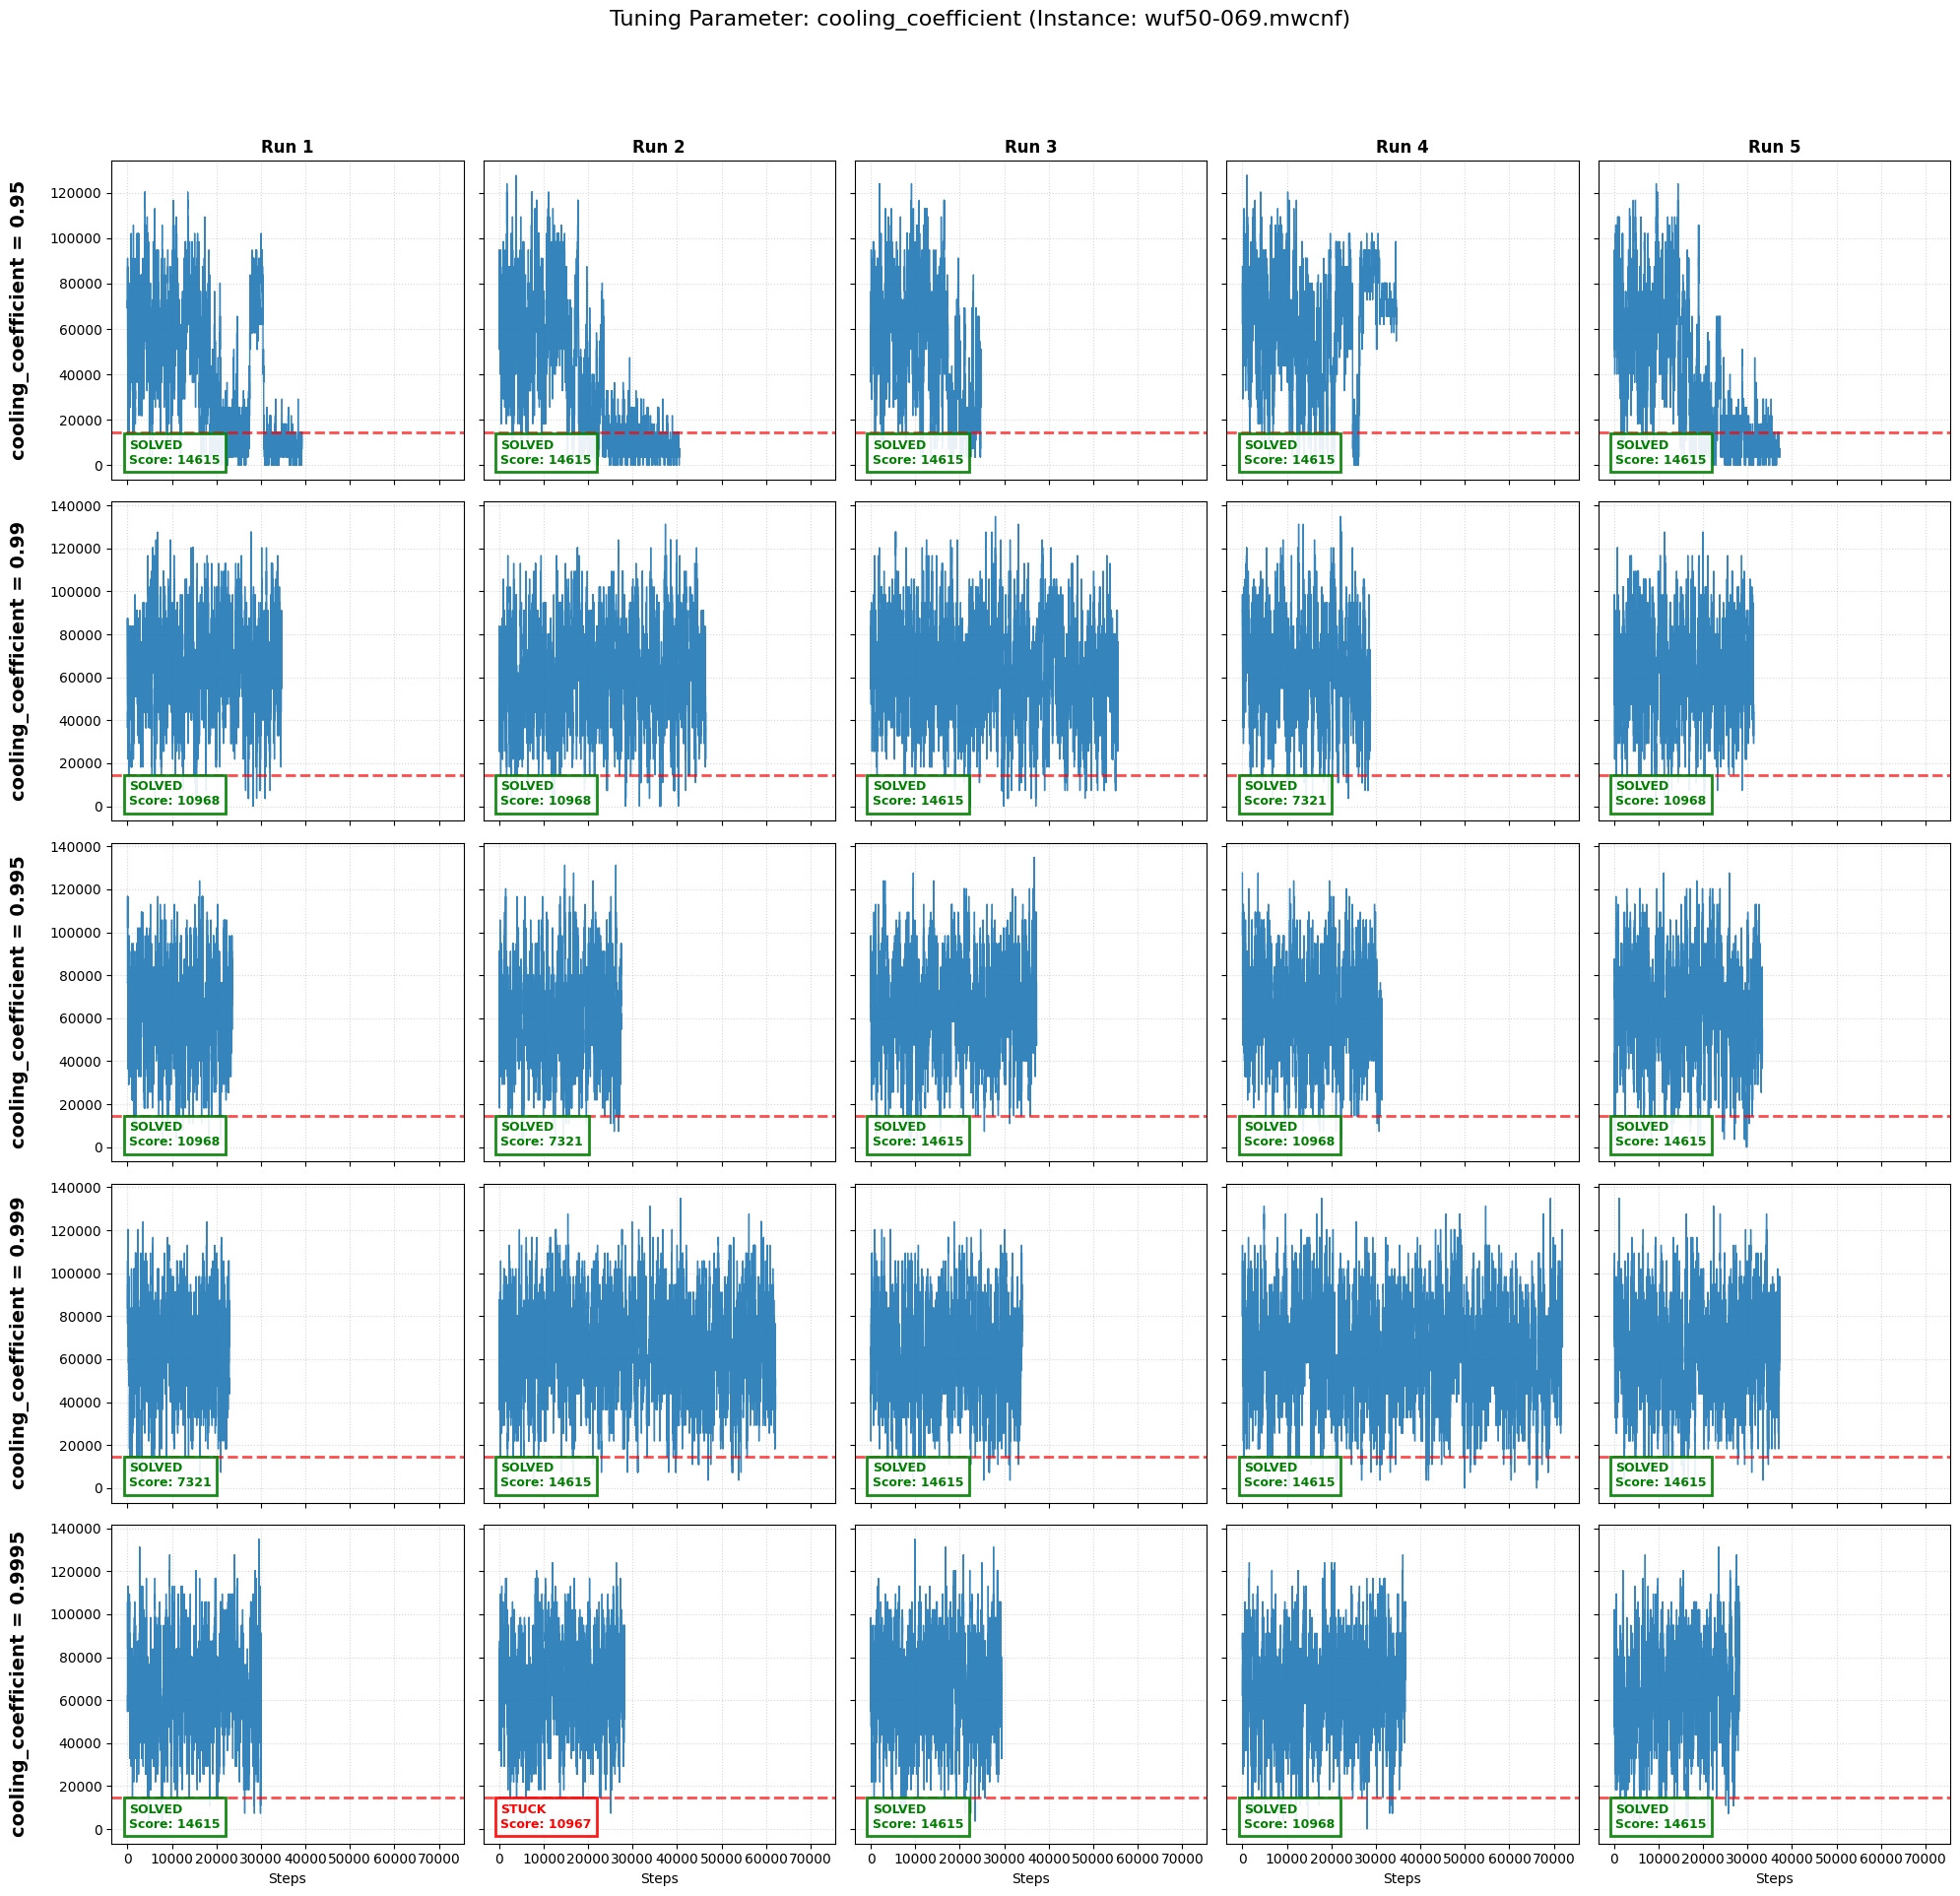


cooling_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.95            | 5    | 5      | 5       | 14615.0    | 100.00%  | 35316.0  
0.99            | 5    | 5      | 1       | 10968.0    | 75.05 %  | 39370.8  
0.995           | 5    | 5      | 2       | 11697.4    | 80.04 %  | 30607.2  
0.999           | 5    | 5      | 4       | 13156.2    | 90.02 %  | 45649.2  
0.9995          | 5    | 4      | 3       | 10962.6    | 75.01 %  | 30476.4  


In [18]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="cooling_coefficient",
    param_values=[0.95, 0.99,0.995, 0.999,0.9995],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [30]:
best_cooling_coeff = 0.95

# 2.5) `Equilibrium_steps`
- je to parametr úzce spjatý s rychlostí chlazení, takže bude dávat smysl ho nastavit hned jako následující

In [21]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "max_steps_without_improvement": 800,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param,    
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="equilibrium_steps",
    param_values=[1,3,4,6,8],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

--- Tuning 'equilibrium_steps' on wuf50-069.mwcnf (25 total runs) ---
Testing equilibrium_steps = 1...
Testing equilibrium_steps = 3...
Testing equilibrium_steps = 4...
Testing equilibrium_steps = 6...
Testing equilibrium_steps = 8...



equilibrium_steps | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
1               | 5    | 5      | 5       | 14615.0    | 100.00%  | 69324.0  
3               | 5    | 5      | 5       | 14615.0    | 100.00%  | 190183.2 
4               | 5    | 5      | 5       | 14615.0    | 100.00%  | 193932.8 
6               | 5    | 5      | 5       | 14615.0    | 100.00%  | 203263.2 
8               | 5    | 5      | 5       | 14615.0    | 100.00%  | 189049.6 


In [45]:
best_equilibrium_steps = 8

In [ ]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "fitness_coefficient": best_fitness_coeff_param,
    "equilibrium_steps": best_equilibrium_steps,
    "P0": best_p0_param
}

results = evaluate_algorithm_performance(instance_paths[:2],solutions_wuf_50_r,base_params,3)

# 2.6) `max_steps_without_improvement`

--- Tuning 'max_steps_without_improvement' on wuf50-010.mwcnf (6 total runs) ---
Testing max_steps_without_improvement = 300...
Testing max_steps_without_improvement = 800...


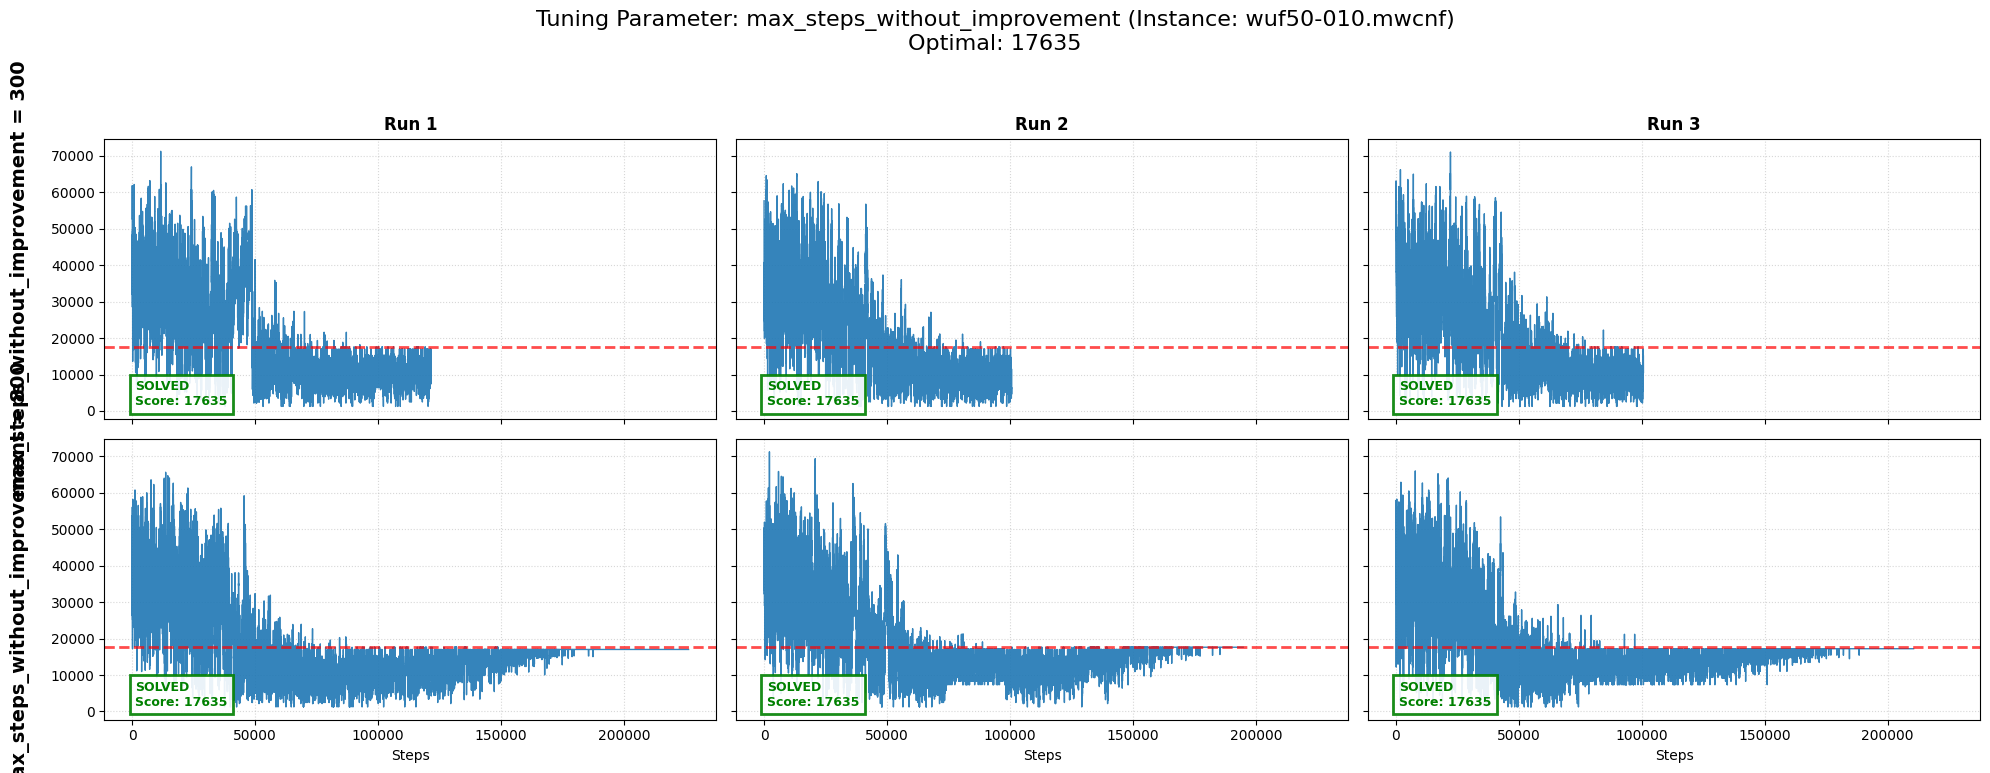


max_steps_without_improvement | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
300             | 3    | 3      | 3       | 17635.0    | 100.00%  | 107692.0 
800             | 3    | 3      | 3       | 17635.0    | 100.00%  | 210588.0 

--- Tuning Parameter: 'max_steps_without_improvement' (Across 10 instances) ---

 max_steps_without_improvement | Runs   | Solved   | Optimal  | Avg % Opt    | Avg Steps 
------------------------------------------------------------------------------------------
 200             | 40     | 40       | 38       | 99.66        | 72888.3   
 300             | 40     | 40       | 39       | 100.00       | 94928.1   
 600             | 40     | 40       | 40       | 100.00       | 158268.0  
 800             | 40     | 40       | 39       | 99.87        | 205552.2  
 1200            | 40     | 40       | 38       | 99.69        | 290735.7  


In [33]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "fitness_coefficient": best_fitness_coeff_param,
    "equilibrium_steps": best_equilibrium_steps,
    "P0": best_p0_param
}

target_path = instance_paths[1]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_r.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="max_steps_without_improvement",
    param_values=[300,800],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=3
)

results = evaluate_param_tuning_no_plot(instance_paths[:10], solutions_wuf_50_r,base_params,"max_steps_without_improvement",[200,300,600,800,1200])

In [46]:
best_max_steps_without_improvement = 800

In [47]:
FINAL_CONFIG = {
    "P0": best_p0_param, 
    "cooling_coefficient": best_cooling_coeff,
    "equilibrium_steps": best_equilibrium_steps, 
    "max_steps_without_improvement": best_max_steps_without_improvement, 
    "fitness_coefficient": best_fitness_coeff_param
}

# Test na instancích s 20 a 75 proměnnými

In [40]:
instance_paths_20 = [os.path.join(wuf_20_m_path,x) for x in os.listdir(wuf_20_m_path)[:10]]
solutions_wuf_20_m = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-M-opt.dat"))

In [41]:
results = evaluate_algorithm_performance(instance_paths_20,solutions_wuf_20_m,FINAL_CONFIG,4,"Baseline configuration on 20 variable instances")

--- Starting Baseline configuration on 20 variable instances (40 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 6, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/10: wuf20-01.mwcnf
Processing Instance 2/10: wuf20-010.mwcnf
Processing Instance 3/10: wuf20-0100.mwcnf
Processing Instance 4/10: wuf20-01000.mwcnf
Processing Instance 5/10: wuf20-0101.mwcnf
Processing Instance 6/10: wuf20-0102.mwcnf
Processing Instance 7/10: wuf20-0103.mwcnf
Processing Instance 8/10: wuf20-0104.mwcnf
Processing Instance 9/10: wuf20-0105.mwcnf
Processing Instance 10/10: wuf20-0106.mwcnf



Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf20-01.mwcnf            | 4    | 4      | 4       | 2293.0     | 100.00%  | 73300.5  
wuf20-010.mwcnf           | 4    | 4      | 4       | 4399.0     | 100.00%  | 73710.0  
wuf20-0100.mwcnf          | 4    | 4      | 4       | 4900.0     | 100.00%  | 74392.5  
wuf20-01000.mwcnf         | 4    | 4      | 4       | 3200.0     | 100.00%  | 73710.0  
wuf20-0101.mwcnf          | 4    | 4      | 4       | 3801.0     | 100.00%  | 74256.0  
wuf20-0102.mwcnf          | 4    | 4      | 4       | 4601.0     | 100.00%  | 75484.5  
wuf20-0103.mwcnf          | 4    | 4      | 4       | 4400.0     | 100.00%  | 73710.0  
wuf20-0104.mwcnf          | 4    | 4      | 4       | 4248.0     | 100.00%  | 73983.0  
wuf20-0105.mwcnf          | 4    | 4      | 4       | 3200.0     | 100.00%  | 74119.5  
wuf20-0106.mwcnf       

# 75 proměnných

In [48]:
instance_paths_75 = [os.path.join(wuf_75_m_path,x) for x in os.listdir(wuf_75_m_path)[:2]]
solutions_wuf_75_m = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-M-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_75,solutions_wuf_75_m,FINAL_CONFIG,4,"Baseline configuration on 75 variable instances")

--- Starting Baseline configuration on 75 variable instances (8 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 8, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/2: wuf75-01.mwcnf
Processing Instance 2/2: wuf75-010.mwcnf



Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf75-01.mwcnf            | 4    | 4      | 4       | 20466.0    | 100.00%  | 364000.0 
wuf75-010.mwcnf           | 4    | 4      | 2       | 18637.0    | 99.99 %  | 383500.0 


# Jiné generování Vah

In [55]:
instance_paths_50 = [os.path.join(wuf_50_m_path,x) for x in os.listdir(wuf_50_m_path)[:2]]
solutions_wuf_50_m = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-M-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_50,solutions_wuf_50_m,FINAL_CONFIG,3,"")

--- Starting  (6 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 8, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/2: wuf50-01.mwcnf
Processing Instance 2/2: wuf50-010.mwcnf



Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-01.mwcnf            | 3    | 3      | 3       | 20150.0    | 100.00%  | 211024.0 
wuf50-010.mwcnf           | 3    | 3      | 3       | 37909.0    | 100.00%  | 228464.0 


--- Starting Baseline configuration on 50 variable instances (6 total runs) ---
Params: {'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 8, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}
Processing Instance 1/2: wuf50-01.mwcnf
Processing Instance 2/2: wuf50-010.mwcnf


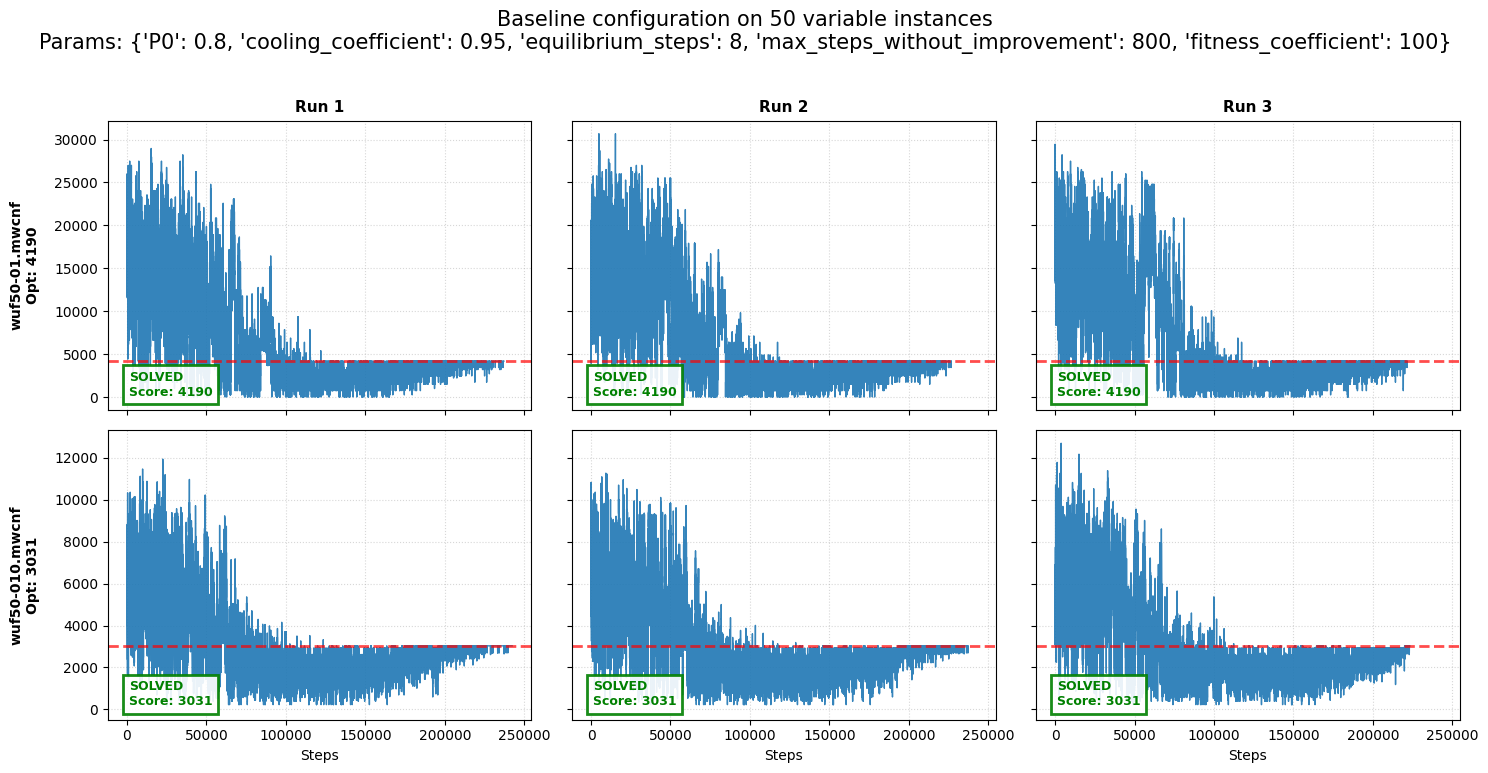


Instance                  | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-01.mwcnf            | 3    | 3      | 3       | 4190.0     | 100.00%  | 228464.0 
wuf50-010.mwcnf           | 3    | 3      | 3       | 3031.0     | 100.00%  | 234277.3 


In [53]:

instance_paths_50_q = [os.path.join(wuf_50_q_path,x) for x in os.listdir(wuf_50_q_path)[:2]]
solutions_wuf_50_q = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-Q-opt.dat"))
results = evaluate_algorithm_performance(instance_paths_50_q,solutions_wuf_50_q,FINAL_CONFIG,3,"Baseline configuration on 50 variable instances")

# Blackbox Fáze

In [28]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [57]:
print(FINAL_CONFIG)

{'P0': 0.8, 'cooling_coefficient': 0.95, 'equilibrium_steps': 8, 'max_steps_without_improvement': 800, 'fitness_coefficient': 100}


In [58]:
from worker_utils import run_blackbox_parallel

In [42]:

instance_paths = [os.path.join(wuf_20_r_path,x) for x in os.listdir(wuf_20_r_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=10 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-R")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 10
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
1      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
2      wuf20-0911.mwcnf      True     True  23689    23689        0.0  74256   
3      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
4      wuf20-0911.mwcnf      True     True  23689    23689        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0572.mwcnf      True     True   3049     3049        0.0  73528   
99996  wuf20-0572.mwcnf      True     True   3049     3049        0.0  75712   
99997  wuf20-0572.mwcnf      True     True   3049     3049        0.0  77168   
99998  wuf20-0572.mwcnf      True     True   3049     3049        0.0  74256   
99999  wuf20-0572.mwcnf      True     True   3049     3049        0.0  73528   

           Time  
0      0.383580  
1      0.377607  
2      0.400077  
3      0.378433  
4      0.372999  
...         ...  
99995  0.360067  
99996  0.417707  
99997  0.426511  
99998  0.361302  
99999  0.351273  

[100000 rows x 8 columns]

In [43]:
instance_paths = [os.path.join(wuf_20_m_path,x) for x in os.listdir(wuf_20_m_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-M")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
1      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
2      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
3      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
4      wuf20-0911.mwcnf      True     True   6638     6638        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0572.mwcnf      True     True   3477     3477        0.0  74984   
99996  wuf20-0572.mwcnf      True     True   3477     3477        0.0  73528   
99997  wuf20-0572.mwcnf      True     True   3477     3477        0.0  73528   
99998  wuf20-0572.mwcnf      True     True   3477     3477        0.0  74256   
99999  wuf20-0572.mwcnf      True     True   3477     3477        0.0  75712   

           Time  
0      0.394691  
1      0.548268  
2      0.445367  
3      0.449494  
4      0.444634  
...         ...  
99995  0.354437  
99996  0.398175  
99997  0.349683  
99998  0.347553  
99999  0.357235  

[100000 rows x 8 columns]

In [44]:
instance_paths = [os.path.join(wuf_20_q_path,x) for x in os.listdir(wuf_20_q_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
1      wuf20-0911.mwcnf      True     True   2247     2247        0.0  74256   
2      wuf20-0911.mwcnf      True     True   2247     2247        0.0  75712   
3      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
4      wuf20-0911.mwcnf      True     True   2247     2247        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0537.mwcnf      True     True    417      417        0.0  73528   
99996  wuf20-0537.mwcnf      True     True    417      417        0.0  74984   
99997  wuf20-0537.mwcnf      True     True    417      417        0.0  74256   
99998  wuf20-0537.mwcnf      True     True    417      417        0.0  74256   
99999  wuf20-0537.mwcnf      True     True    417      417        0.0  73528   

           Time  
0      0.446847  
1      0.433554  
2      0.460243  
3      0.439297  
4      0.423190  
...         ...  
99995  0.334339  
99996  0.338266  
99997  0.332106  
99998  0.348992  
99999  0.331954  

[100000 rows x 8 columns]

In [45]:
instance_paths = [os.path.join(wuf_20_n_path,x) for x in os.listdir(wuf_20_n_path)]
solutions = get_solution_dict(os.path.join(wuf_20_path,"wuf20-91-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf20-91-N")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error  Steps  \
0      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
1      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
2      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
3      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
4      wuf20-0911.mwcnf      True     True  52276    52276        0.0  73528   
...                 ...       ...      ...    ...      ...        ...    ...   
99995  wuf20-0537.mwcnf      True     True  18167    18167        0.0  73528   
99996  wuf20-0537.mwcnf      True     True  18167    18167        0.0  73528   
99997  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   
99998  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   
99999  wuf20-0537.mwcnf      True     True  18167    18167        0.0  74256   

           Time  
0      0.433480  
1      0.471480  
2      0.432558  
3      0.435537  
4      0.414869  
...         ...  
99995  0.331277  
99996  0.332314  
99997  0.333755  
99998  0.333068  
99999  0.332929  

[100000 rows x 8 columns]

In [46]:
instance_paths = [os.path.join(wuf_50_n_path,x) for x in os.listdir(wuf_50_n_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-N")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success   Score  Optimum  Rel_Error  \
0      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
1      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
2      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
3      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
4      wuf50-0556.mwcnf      True     True  256073   256073        0.0   
...                 ...       ...      ...     ...      ...        ...   
99995  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99996  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99997  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99998  wuf50-0277.mwcnf      True     True  259292   259292        0.0   
99999  wuf50-0277.mwcnf      True     True  259292   259292        0.0   

        Steps      Time  
0      176144  1.183171  
1      186608  1.143567  
2      202304  1.302799  
3      184864  1.212153  
4      176144  1.074071  
...       ...       ...  
99995  197072  0.941950  
99996  214512  1.034257  
99997  207536  0.978449  
99998  224976  1.062096  
99999  186608  0.861523  

[100000 rows x 8 columns]

In [47]:
instance_paths = [os.path.join(wuf_50_r_path,x) for x in os.listdir(wuf_50_r_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-R")

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

In [48]:
instance_paths = [os.path.join(wuf_50_m_path,x) for x in os.listdir(wuf_50_m_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=12 # Uses all cores automatically
)
df_results.to_csv("wuf-50-218-M")
display(df_results)
print(df_results["Rel_Error"].mean())

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 12
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...
Completed 14/1000 instances...
Completed 15/1000 instances...
Completed 16/1000 instances...
Completed 17/1000 instances...
Completed 18/1000 instances...
Completed 19/1000 instances...
Completed 20/1000 instances...
Completed 21/1000 instances...
Completed 22/1000 instances...
Completed 23/1000 instances...
Completed 24/1000 instances...
Completed 25/1000 instances...
Completed 26/1000 instances...
Completed 27/1000 instances...
Completed 28/1000 instances...
Completed 29/1000 ins

Instance  Is_Valid  Success  Score  Optimum  Rel_Error   Steps  \
0      wuf50-0286.mwcnf      True     True  20379    20379        0.0  188352   
1      wuf50-0286.mwcnf      True     True  20379    20379        0.0  176144   
2      wuf50-0286.mwcnf      True     True  20379    20379        0.0  218000   
3      wuf50-0286.mwcnf      True     True  20379    20379        0.0  198816   
4      wuf50-0286.mwcnf      True     True  20379    20379        0.0  212768   
...                 ...       ...      ...    ...      ...        ...     ...   
99995  wuf50-0277.mwcnf      True     True  19728    19728        0.0  223232   
99996  wuf50-0277.mwcnf      True     True  19728    19728        0.0  218000   
99997  wuf50-0277.mwcnf      True     True  19728    19728        0.0  216256   
99998  wuf50-0277.mwcnf      True     True  19728    19728        0.0  211024   
99999  wuf50-0277.mwcnf      True     True  19728    19728        0.0  221488   

           Time  
0      1.148536  
1      1.040327  
2      1.316045  
3      1.202231  
4      1.101906  
...         ...  
99995  1.019140  
99996  1.039043  
99997  1.031183  
99998  0.976260  
99999  1.035590  

[100000 rows x 8 columns]

0.008190077557986793


In [ ]:
instance_paths = [os.path.join(wuf_50_q_path,x) for x in os.listdir(wuf_50_q_path)]
solutions = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=100,
    max_workers=11
)
df_results.to_csv("wuf-50-218-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 1000
Repeats per Instance: 100
Total Runs: 100000
Parallel Workers: 11
Completed 1/1000 instances...
Completed 2/1000 instances...
Completed 3/1000 instances...
Completed 4/1000 instances...
Completed 5/1000 instances...
Completed 6/1000 instances...
Completed 7/1000 instances...
Completed 8/1000 instances...
Completed 9/1000 instances...
Completed 10/1000 instances...
Completed 11/1000 instances...
Completed 12/1000 instances...
Completed 13/1000 instances...


In [ ]:
instance_paths = [os.path.join(wuf_75_q_path,x) for x in os.listdir(wuf_75_q_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-Q-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=11 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-Q")
display(df_results)

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success  Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True    297      297   0.000000  207900  1.383804
1      wuf75-03.mwcnf     True    297      297   0.000000  175500  1.039087
2      wuf75-03.mwcnf     True    297      297   0.000000  224400  1.468401
3      wuf75-03.mwcnf     True    297      297   0.000000  194700  1.087733
4      wuf75-03.mwcnf     True    297      297   0.000000  214500  1.325046
...               ...      ...    ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf    False   6008     6976   0.138761  212100  0.985951
1996  wuf75-010.mwcnf    False   5739     6976   0.177322  168300  0.758077
1997  wuf75-010.mwcnf    False   6401     6976   0.082425  196800  0.910552
1998  wuf75-010.mwcnf     True   6976     6976   0.000000  278400  1.308160
1999  wuf75-010.mwcnf    False   6236     6976   0.106078  229500  1.046367

[2000 rows x 7 columns]

In [ ]:
instance_paths = [os.path.join(wuf_75_m_path,x) for x in os.listdir(wuf_75_m_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-M-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=11 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-M")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success  Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True  24453    24453   0.000000  214800  1.326056
1      wuf75-03.mwcnf     True  24453    24453   0.000000  216600  1.320075
2      wuf75-03.mwcnf     True  24453    24453   0.000000  223800  1.366110
3      wuf75-03.mwcnf     True  24453    24453   0.000000  214500  1.289507
4      wuf75-03.mwcnf     True  24453    24453   0.000000  212100  1.315245
...               ...      ...    ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf     True  18638    18638   0.000000  267900  1.247617
1996  wuf75-010.mwcnf    False  18622    18638   0.000858  248700  1.151293
1997  wuf75-010.mwcnf    False  18636    18638   0.000107  228900  1.036679
1998  wuf75-010.mwcnf     True  18638    18638   0.000000  262500  1.190311
1999  wuf75-010.mwcnf    False  18622    18638   0.000858  242400  1.080864

[2000 rows x 7 columns]

0.015575153704304606
1527


In [ ]:
instance_paths = [os.path.join(wuf_75_r_path,x) for x in os.listdir(wuf_75_r_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-R-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=11 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-R")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())
print(df_results["Is_Valid"].sum())

--- Starting Black Box Evaluation ---
Instances: 10
Repeats per Instance: 20
Total Runs: 200
Parallel Workers: 10
Completed 1/10 instances...
Completed 2/10 instances...
Completed 3/10 instances...
Completed 4/10 instances...
Completed 5/10 instances...
Completed 6/10 instances...
Completed 7/10 instances...
Completed 8/10 instances...
Completed 9/10 instances...
Completed 10/10 instances...
--- Evaluation Complete ---


Instance  Is_Valid  Success  Score  Optimum  Rel_Error    Steps  \
0     wuf75-03.mwcnf      True     True   4579     4579   0.000000   649500   
1     wuf75-03.mwcnf      True    False   2307     4579   0.496178   423600   
2     wuf75-03.mwcnf      True     True   4579     4579   0.000000   492000   
3     wuf75-03.mwcnf      True     True   4579     4579   0.000000   627900   
4     wuf75-03.mwcnf      True     True   4579     4579   0.000000   614400   
..               ...       ...      ...    ...      ...        ...      ...   
195  wuf75-080.mwcnf      True     True  78623    78623   0.000000   920100   
196  wuf75-080.mwcnf      True     True  78623    78623   0.000000   975900   
197  wuf75-080.mwcnf      True    False  72359    78623   0.079671   568200   
198  wuf75-080.mwcnf      True     True  78623    78623   0.000000  1021200   
199  wuf75-080.mwcnf      True     True  78623    78623   0.000000   859200   

         Time  
0    3.211768  
1    1.849882  
2    2.211208  
3    2.833450  
4    2.778288  
..        ...  
195  3.832128  
196  4.094883  
197  2.219948  
198  4.286595  
199  3.456435  

[200 rows x 8 columns]

0.011036369941749634
173
200


In [ ]:
instance_paths = [os.path.join(wuf_75_n_path,x) for x in os.listdir(wuf_75_n_path)]
solutions = get_solution_dict(os.path.join(wuf_75_path,"wuf75-325-N-opt.dat"))

df_results = run_blackbox_parallel(
    instance_paths=instance_paths,
    solutions_dict=solutions,
    params=FINAL_CONFIG,
    n_repeats=50,
    max_workers=11 # Uses all cores automatically
)
df_results.to_csv("wuf-75-325-N")
display(df_results)
print(df_results['Rel_Error'].mean())
print(df_results['Success'].sum())

--- Starting Black Box Evaluation ---
Instances: 100
Repeats per Instance: 20
Total Runs: 2000
Parallel Workers: 12
Completed 1/100 instances...
Completed 2/100 instances...
Completed 3/100 instances...
Completed 4/100 instances...
Completed 5/100 instances...
Completed 6/100 instances...
Completed 7/100 instances...
Completed 8/100 instances...
Completed 9/100 instances...
Completed 10/100 instances...
Completed 11/100 instances...
Completed 12/100 instances...
Completed 13/100 instances...
Completed 14/100 instances...
Completed 15/100 instances...
Completed 16/100 instances...
Completed 17/100 instances...
Completed 18/100 instances...
Completed 19/100 instances...
Completed 20/100 instances...
Completed 21/100 instances...
Completed 22/100 instances...
Completed 23/100 instances...
Completed 24/100 instances...
Completed 25/100 instances...
Completed 26/100 instances...
Completed 27/100 instances...
Completed 28/100 instances...
Completed 29/100 instances...
Completed 30/100 instan

Instance  Success   Score  Optimum  Rel_Error   Steps      Time
0      wuf75-03.mwcnf     True  167642   167642   0.000000  212100  1.303935
1      wuf75-03.mwcnf     True  167642   167642   0.000000  194100  1.174323
2      wuf75-03.mwcnf     True  167642   167642   0.000000  211800  1.224283
3      wuf75-03.mwcnf     True  167642   167642   0.000000  199800  1.189565
4      wuf75-03.mwcnf     True  167642   167642   0.000000  213300  1.314801
...               ...      ...     ...      ...        ...     ...       ...
1995  wuf75-010.mwcnf     True  201125   201125   0.000000  245100  1.130043
1996  wuf75-010.mwcnf     True  201125   201125   0.000000  297000  1.385529
1997  wuf75-010.mwcnf    False  201106   201125   0.000094  314100  1.465196
1998  wuf75-010.mwcnf    False  201106   201125   0.000094  245400  1.114754
1999  wuf75-010.mwcnf    False  199654   201125   0.007314  258900  1.165076

[2000 rows x 7 columns]

0.017593024784673502
1527
